In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import yaml

from src import data_catalog
from src import tseries_mod
from src.CAM_tools import CAM_kg_to_dry_vmr
from src.config import expr_metadata_fname
from src.utils_units import conv_units, mult_w_units, div_w_units
from src.utils_plot import gen_plot_opt_list, plot_1var

%matplotlib inline

In [2]:
collection_name = 'cesm_coupled'
data_catalog.set_catalog(collection_name)

with open(expr_metadata_fname) as fptr:
    expr_metadata_all = yaml.full_load(fptr)
expr_metadata = expr_metadata_all[collection_name]['data_sources']

active catalog: cesm_coupled


In [3]:
varnames = ['TS', 'PS', 'TMCO2', 'TMCO2_LND', 'TMCO2_OCN', 'CO2', 'CO2_LND', 'CO2_OCN']
ds_dict = {}

experiment = 'esm-piControl'
ds_dict[experiment] = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, freq='ann').sel(region='Global')
ds_dict[experiment].attrs['experiment'] = experiment
ds_dict[experiment].attrs['legend'] = 'CESM2'

experiment = 'esm-piControl-cmip5'
ds_dict[experiment] = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, stream='cam2.h0', freq='ann').sel(region='Global')
ds_dict[experiment].attrs['experiment'] = experiment
ds_dict[experiment].attrs['legend'] = 'CESM1(BGC)'

experiment = 'piControl'
ds_dict[experiment] = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, freq='ann').sel(region='Global')
ds_dict[experiment].attrs['experiment'] = experiment
ds_dict[experiment].attrs['legend'] = 'CESM2'

experiment = 'piControl-cmip5'
ds_dict[experiment] = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, stream='cam2.h0', freq='ann').sel(region='Global')
ds_dict[experiment].attrs['experiment'] = experiment
ds_dict[experiment].attrs['legend'] = 'CESM1(BGC)'


In [4]:
mwC = xr.DataArray(12.0, attrs={'units': 'g/mol'})

for experiment, ds in ds_dict.items():
    print(f'experiment={experiment}')

    # subtract initial value from LND and OCN variable variants
    for varname in ['CO2_LND', 'CO2_OCN', 'TMCO2_LND', 'TMCO2_OCN']:
        ds[varname] -= ds[varname].isel(time=0)

    # add CO2_BOT, CO2_LND_BOT, CO2_OCN_BOT to ds
    for varname in ['CO2', 'CO2_LND', 'CO2_OCN']:
        ds[varname + '_BOT'] = ds[varname].isel(lev=-1)

    # add TMCO2_ppmv, TMCO2_LND_ppmv, TMCO2_OCN_ppmv to ds
    conv_factor = CAM_kg_to_dry_vmr(ds, 'TMCO2', mwC)
    print(div_w_units(1.0, conv_factor))
    for varname in ['TMCO2', 'TMCO2_LND', 'TMCO2_OCN']:
        ds[varname + '_ppmv'] = conv_units(mult_w_units(conv_factor, ds[varname]), 'ppmv')

experiment=esm-piControl
<xarray.DataArray ()>
array(2.11325384e+18)
Coordinates:
    region   <U6 'Global'
Attributes:
    units:    kg
experiment=esm-piControl-cmip5
<xarray.DataArray ()>
array(2.11338567e+18)
Coordinates:
    region   <U6 'Global'
Attributes:
    units:    kg
experiment=piControl
<xarray.DataArray ()>
array(2.11325384e+18)
Coordinates:
    region   <U6 'Global'
Attributes:
    units:    kg
experiment=piControl-cmip5
<xarray.DataArray ()>
array(2.11338567e+18)
Coordinates:
    region   <U6 'Global'
Attributes:
    units:    kg


In [5]:
def plot_wrap(varname, expr_list, fname=None):
    print(expr_list)
    legend_list = [ds_dict[expr].attrs['legend'] for expr in expr_list]
    color_list = gen_plot_opt_list(expr_list, expr_metadata, 'color')
    linestyle_list = gen_plot_opt_list(expr_list, expr_metadata, 'linestyle')
    plot_1var(varname, [ds_dict[expr] for expr in expr_list],
              legend_list, figsize=(7.5,4.5),
              linewidth=2.0, color_list=color_list, linestyle_list=linestyle_list, fname=fname)
    plt.show()

['esm-piControl', 'esm-piControl-cmip5']


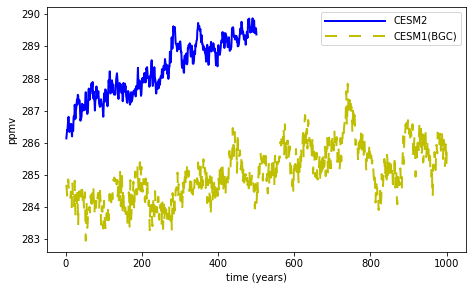

['piControl', 'piControl-cmip5']


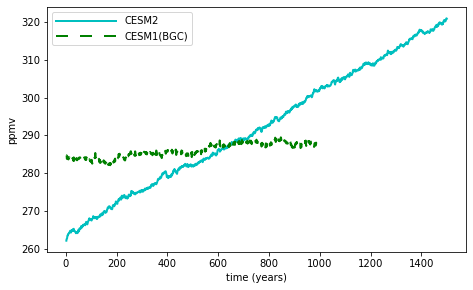

In [6]:
plot_wrap('CO2_BOT', ['esm-piControl', 'esm-piControl-cmip5'], 'CO2_BOT_esm-piControl.pdf')
plot_wrap('CO2_BOT', ['piControl', 'piControl-cmip5'])

['esm-piControl', 'esm-piControl-cmip5']


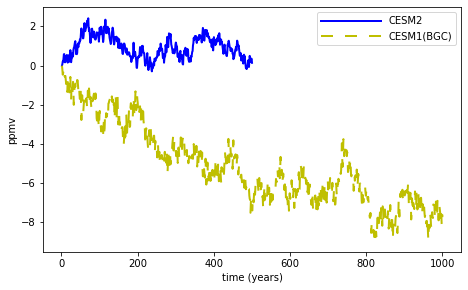

['piControl', 'piControl-cmip5']


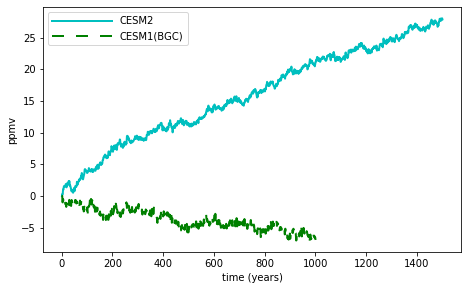

In [7]:
plot_wrap('CO2_LND_BOT', ['esm-piControl', 'esm-piControl-cmip5'])
plot_wrap('CO2_LND_BOT', ['piControl', 'piControl-cmip5'])

['esm-piControl', 'esm-piControl-cmip5']


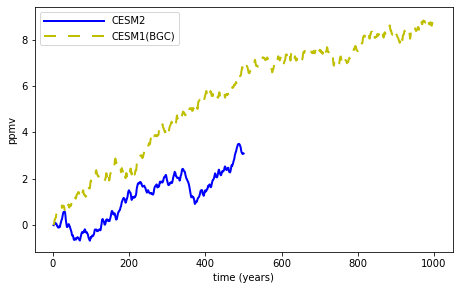

['piControl', 'piControl-cmip5']


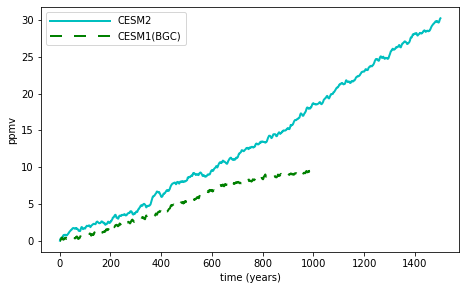

In [8]:
plot_wrap('CO2_OCN_BOT', ['esm-piControl', 'esm-piControl-cmip5'])
plot_wrap('CO2_OCN_BOT', ['piControl', 'piControl-cmip5'])

['esm-piControl', 'esm-piControl-cmip5']


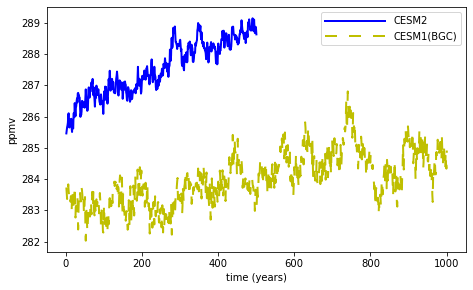

['piControl', 'piControl-cmip5']


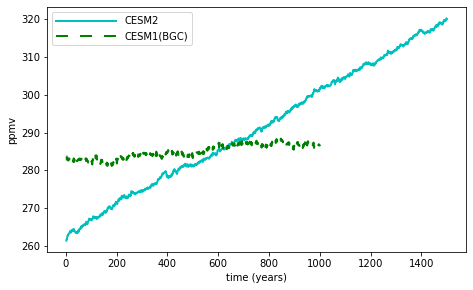

In [9]:
plot_wrap('TMCO2_ppmv', ['esm-piControl', 'esm-piControl-cmip5'], 'TMCO2_esm-piControl.pdf')
plot_wrap('TMCO2_ppmv', ['piControl', 'piControl-cmip5'])

['esm-piControl', 'esm-piControl-cmip5']


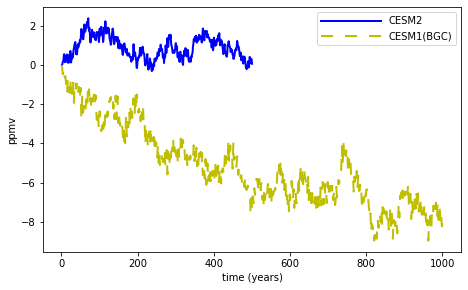

['piControl', 'piControl-cmip5']


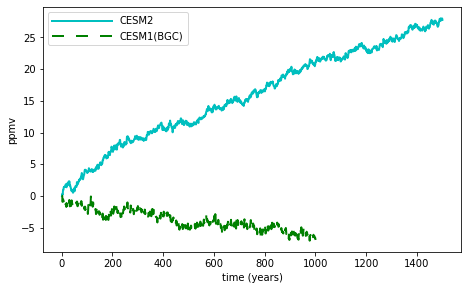

In [10]:
plot_wrap('TMCO2_LND_ppmv', ['esm-piControl', 'esm-piControl-cmip5'])
plot_wrap('TMCO2_LND_ppmv', ['piControl', 'piControl-cmip5'])

['esm-piControl', 'esm-piControl-cmip5']


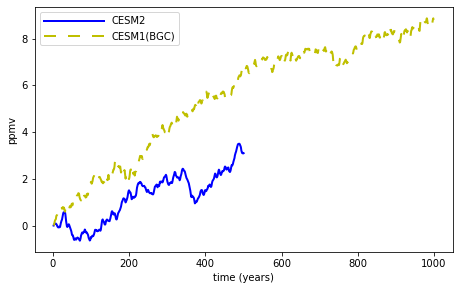

['piControl', 'piControl-cmip5']


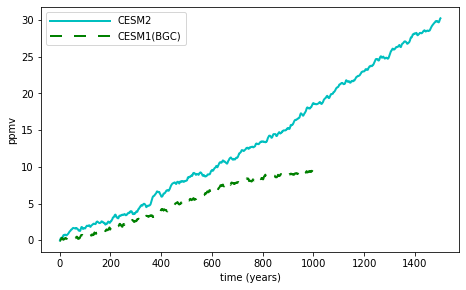

In [11]:
plot_wrap('TMCO2_OCN_ppmv', ['esm-piControl', 'esm-piControl-cmip5'])
plot_wrap('TMCO2_OCN_ppmv', ['piControl', 'piControl-cmip5'])